In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the cleaned dataset
df = pd.read_csv('preprocessed_used_cars_final.csv')

In [3]:
df.shape

(327127, 17)

In [4]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,Unknown,pickup,white,al,32.590,-85.4800
1,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,Unknown,pickup,blue,al,32.590,-85.4800
2,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,Unknown,pickup,red,al,32.590,-85.4800
3,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,Unknown,pickup,red,al,32.590,-85.4800
4,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592,-85.5189


## Exploratory Data Analysis

### Univariate Analysis
Distributions of key numerical columns: `price`, `year`, and `odometer`.

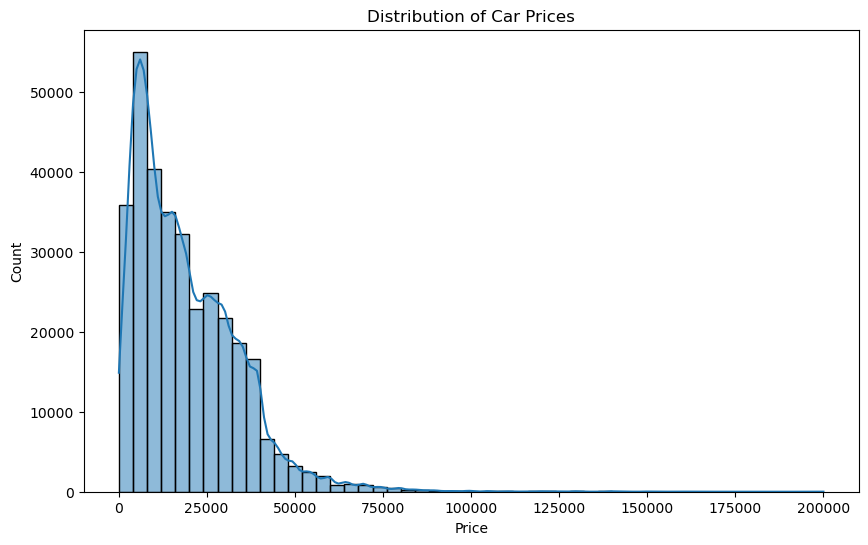

In [6]:
# Price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

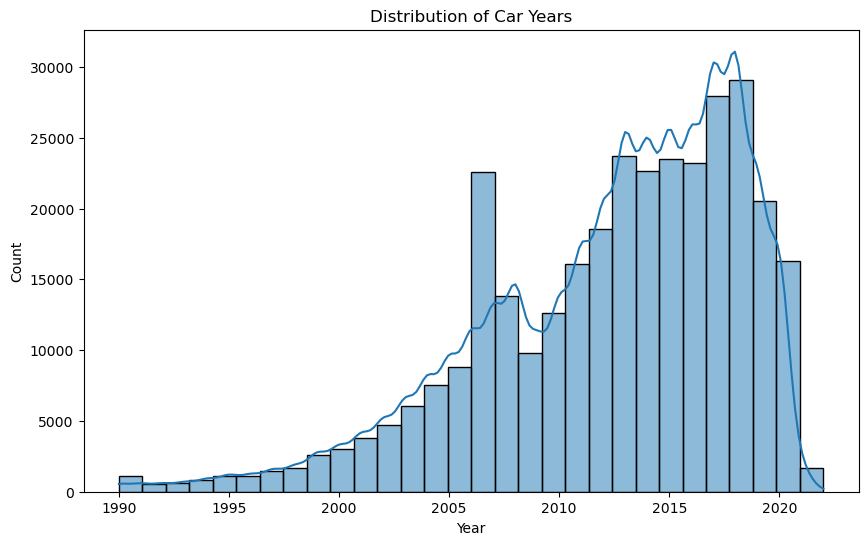

In [7]:
# Year distribution
plt.figure(figsize=(10,6))
sns.histplot(df['year'], bins=30, kde=True)
plt.title('Distribution of Car Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

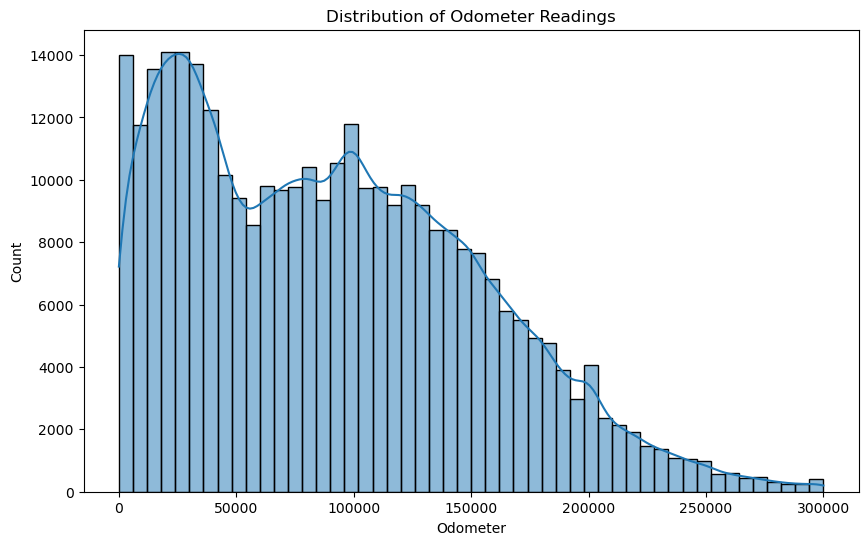

In [8]:
# Odometer distribution
plt.figure(figsize=(10,6))
sns.histplot(df['odometer'], bins=50, kde=True)
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Count')
plt.show()

### Bivariate Analysis
Explore relationships between pairs of variables (`price` vs. `year`, `price` vs. `odometer`).

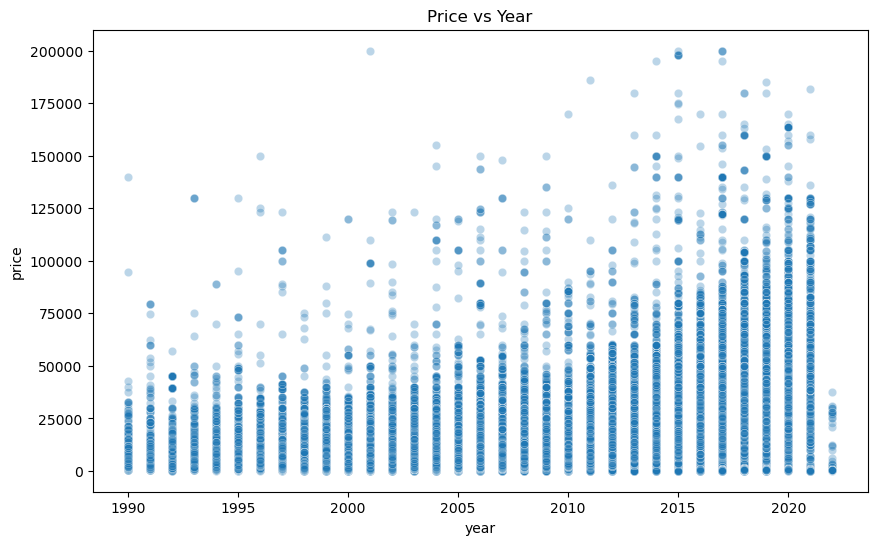

In [10]:
# Price vs Year
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='year', y='price', alpha=0.3)
plt.title('Price vs Year')
plt.show()

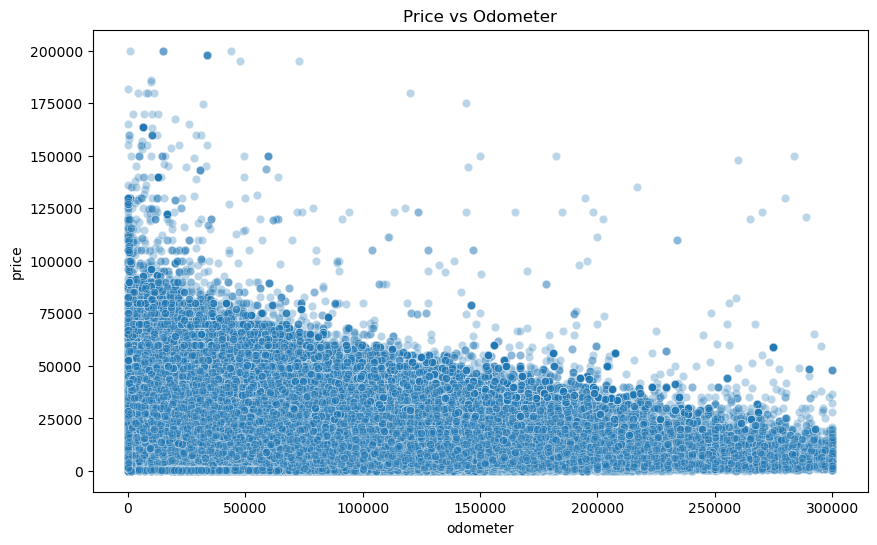

In [11]:
# Price vs Odometer
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.3)
plt.title('Price vs Odometer')
plt.show()

#### Categorical Analysis
Check how some key categorical columns (`manufacturer`, `condition`) relate to `price`.

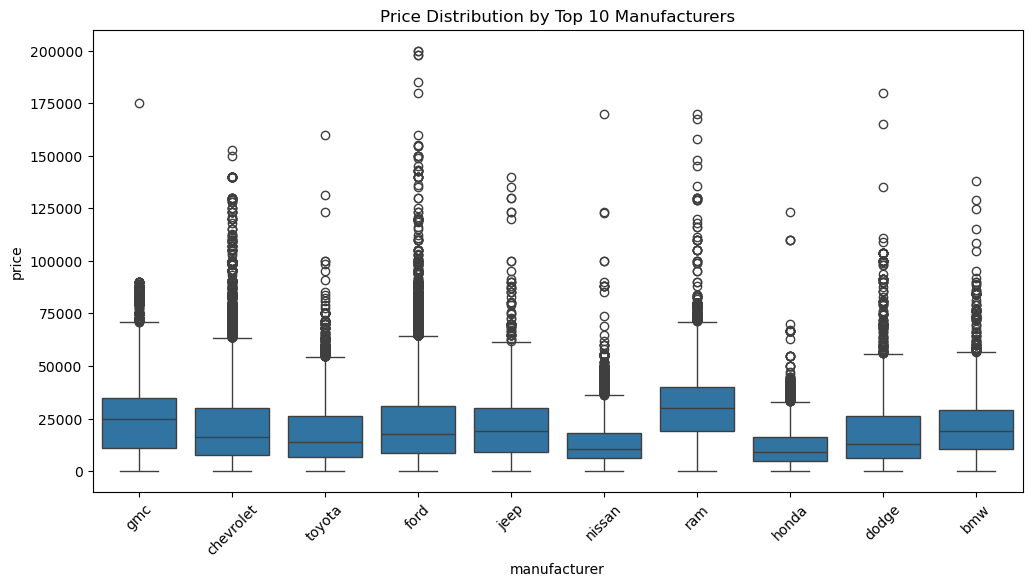

In [13]:
# Price by Manufacturer (Top 10 manufacturers)
top_manufs = df['manufacturer'].value_counts().index[:10]
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['manufacturer'].isin(top_manufs)], x='manufacturer', y='price')
plt.xticks(rotation=45)
plt.title('Price Distribution by Top 10 Manufacturers')
plt.show()

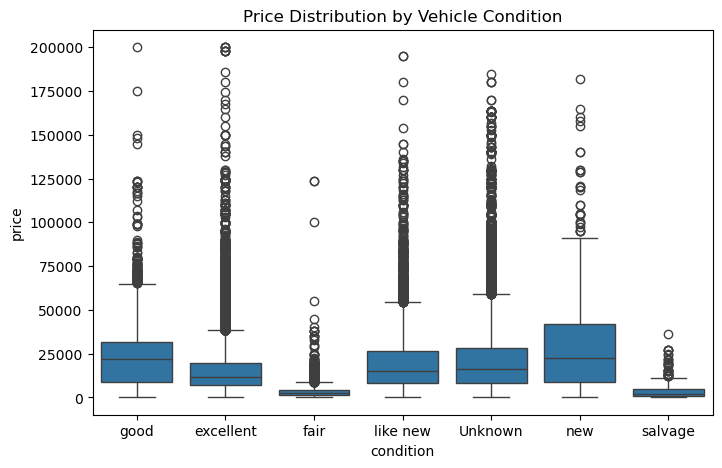

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='condition', y='price')
plt.title('Price Distribution by Vehicle Condition')
plt.show()

### Correlation Analysis
Check correlation among numerical variables like `price`, `year`, and `odometer`.

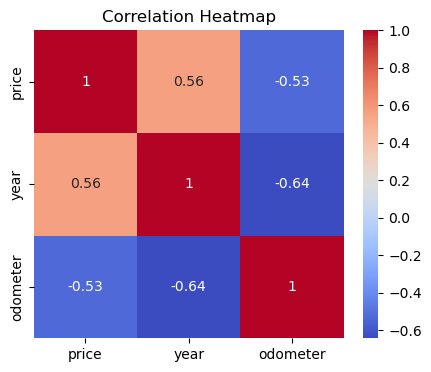

In [16]:
numeric_cols = ['price', 'year', 'odometer']
corr = df[numeric_cols].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Predictive Modeling

#### Label Encoding

In [19]:
cat_cols = [
    'region', 'manufacturer', 'model', 'condition', 'cylinders',
    'fuel', 'title_status', 'transmission', 'drive', 'type',
    'paint_color', 'state'
]

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [20]:
df['year'] = df['year'].astype(int)

#### Feature Selection

In [23]:
X = df.drop('price', axis=1)
y = df['price'].values

#### Train-Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (261701, 16)
Test set shape: (65426, 16)


#### Model Training (Random Forest Regressor)

In [25]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

#### Model Evaluation
Evaluation metrics:   **RMSE** and **R²**.

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Regressor:
RMSE: 5362.24
R² Score: 0.8699


#### Feature Importance
Examine features are most influential in predicting `price`.

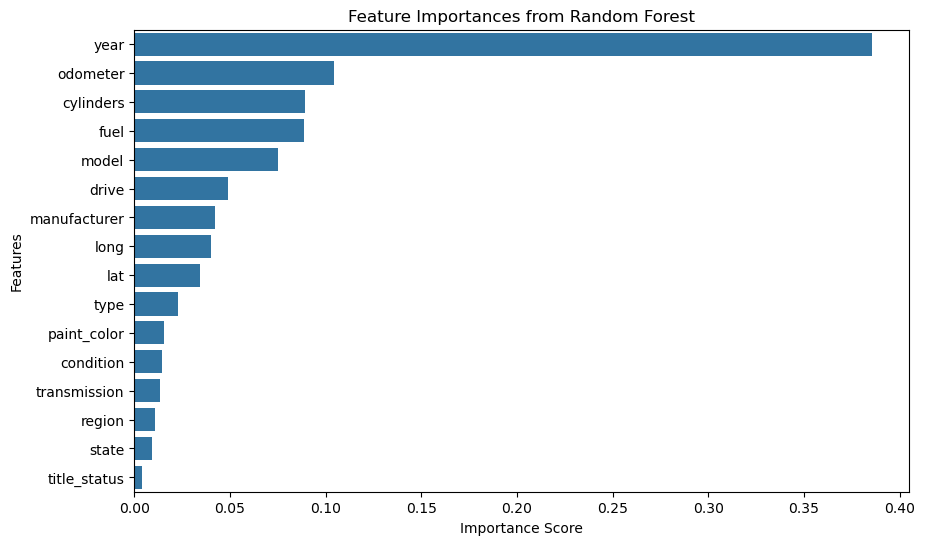

In [27]:
feature_importances = rf.feature_importances_
feature_names = X.columns

# Create a Series for easy plotting
importances_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances_series.values, y=importances_series.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

#### Model Performance Overview

**Random Forest Regressor:**
- **RMSE:** \$5,362.24
- **R² Score:** 0.8699

**Analysis:**
The Random Forest model exhibits strong predictive performance with an R² score of **0.8699**, indicating that approximately **86.99%** of the variance in used car prices is explained by the model. The RMSE of **\$5,362.24** reflects the average prediction error, which is considered reasonable depending on the price range of the dataset.

The top features—**Year**, **Odometer**, **Cylinders**, **Fuel**, **Model**, **Drive**, and **Manufacturer**—are consistent with industry insights, as they directly influence a vehicle's value. **Year** and **Odometer** capture the car's age and usage, while **Cylinders**, **Fuel**, **Model**, **Drive**, and **Manufacturer** reflect the vehicle's specifications and brand reputation, all of which are critical factors in determining price.

Overall, the model effectively leverages these key features to provide accurate price predictions, making it a valuable tool for stakeholders in the used car market.




